<a href="https://colab.research.google.com/github/Madala-pavani/Online-Food-Order-Prediction/blob/main/nasahazardous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import(accuracy_score,classification_report,confusion_matrix)


In [ ]:
d=pd.read_csv("nasa.csv")

In [ ]:
d.shape

(4687, 40)

In [ ]:
d.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [ ]:
d.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [ ]:
d.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4682    False
4683    False
4684    False
4685    False
4686    False
Length: 4687, dtype: bool

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:

categorical = [i for i in d.columns if d[i].dtype == 'object']
print('Categorical columns :',categorical)

numerical = [i for i in d.columns if d[i].dtype != 'object']
print('Numerical columns :',numerical)

boolean = [i for i in d.columns if d[i].dtype == 'bool']
print('Boolean columns :',boolean)


Categorical columns : ['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox']
Numerical columns : ['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous']
Boolean columns : ['Hazardous']


In [ ]:
d= d.drop(['Neo Reference ID', 'Name', 'Orbit ID', 'Close Approach Date',
                        'Epoch Date Close Approach', 'Orbit Determination Date'] , axis = 1)
d.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
print(d['Orbiting Body'].unique())

['Earth']


In [ ]:
print(d['Equinox'].unique())

['J2000']


In [ ]:
print(d['Hazardous'].unique())

[ True False]


In [ ]:
mappings = {
    'Orbiting Body': {'Earth':0},
    'Equinox':{'J2000':0},
}

for column, mapping in mappings.items():
    d[column].replace(mapping, inplace=True)


In [ ]:
d['Hazardous'] = d['Hazardous'].replace({True:1, False:0})



In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Relative Velocity km per sec  4687 non-null   float64
 10  Relative Velocity km per hr   4687 non-null   float64
 11  Miles per hour                4687 non-null   float64
 12  Miss Dist.(Astronomical)      4687 non-null   float64
 13  Mis

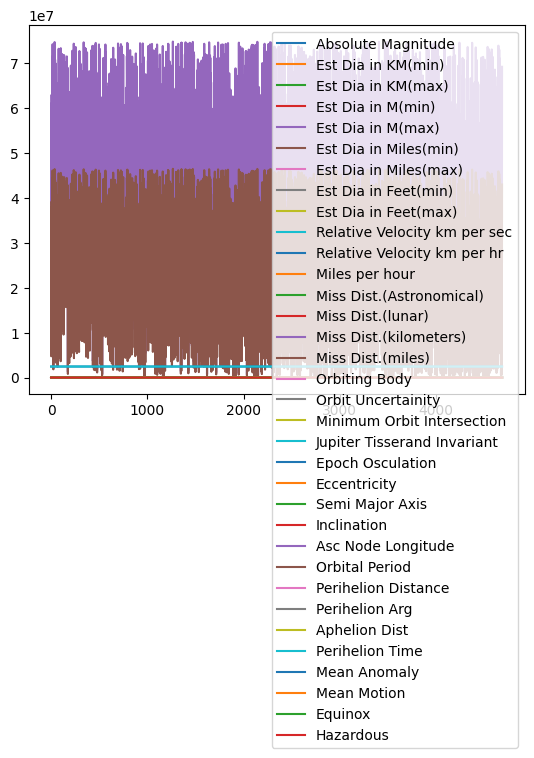

In [ ]:
d.plot()
plt.show()

<Axes: >

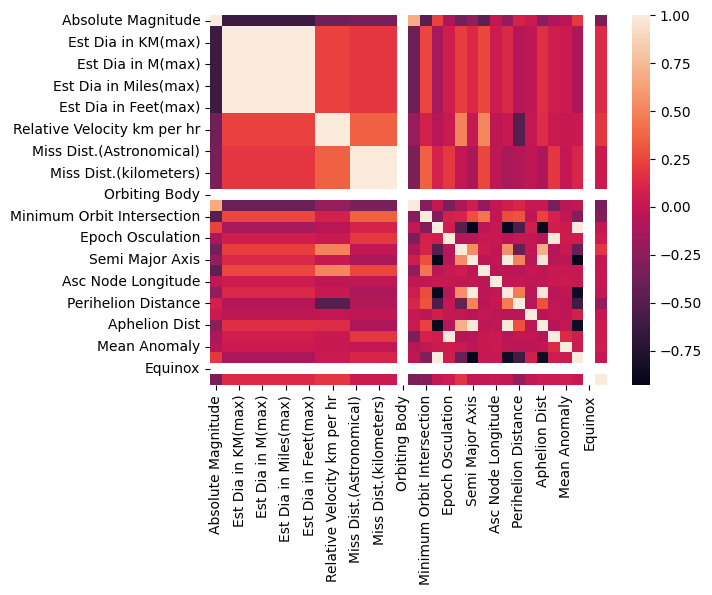

In [ ]:
d.corr()
sb.heatmap(d.corr())

In [ ]:
x=d.drop("Hazardous",axis=1)
y=d["Hazardous"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7697228144989339

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1431,  131],
       [ 242,   71]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.92      0.88      1562
           1       0.35      0.23      0.28       313

    accuracy                           0.80      1875
   macro avg       0.60      0.57      0.58      1875
weighted avg       0.77      0.80      0.78      1875



In [ ]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)
y_predict1=model1.predict(x_test)
accuracy_score(y_test,y_predict1)

0.9946666666666667

In [ ]:
confusion_matrix(y_test,y_predict1)

array([[1558,    4],
       [   6,  307]])

In [ ]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train,y_train)
y_predict2=model2.predict(x_test)
accuracy_score(y_test,y_predict2)

0.8122666666666667

In [ ]:
model3=SVC()
model3.fit(x_train,y_train)
y_predict3=model3.predict(x_test)
accuracy_score(y_test,y_predict3)

0.8330666666666666

In [ ]:
model4=AdaBoostClassifier(n_estimators=5)
model4.fit(x_train,y_train)
y_predict4=model4.predict(x_test)
accuracy_score(y_test,y_predict4)

0.9946666666666667

[Text(0.7777777777777778, 0.9444444444444444, 'x[18] <= 0.05\ngini = 0.265\nsamples = 2812\nvalue = [2370, 442]'), Text(0.6666666666666666, 0.8333333333333334, 'x[2] <= 0.242\ngini = 0.432\nsamples = 1400\nvalue = [958, 442]'), Text(0.5555555555555556, 0.7222222222222222, 'x[7] <= 309.496\ngini = 0.024\nsamples = 970\nvalue = [958, 12]'), Text(0.3333333333333333, 0.6111111111111112, 'x[26] <= 0.437\ngini = 0.002\nsamples = 937\nvalue = [936, 1]'), Text(0.2222222222222222, 0.5, 'x[26] <= 0.433\ngini = 0.051\nsamples = 38\nvalue = [37, 1]'), Text(0.1111111111111111, 0.3888888888888889, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'), Text(0.3333333333333333, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 899\nvalue = [899, 0]'), Text(0.7777777777777778, 0.6111111111111112, 'x[17] <= 2.5\ngini = 0.444\nsamples = 33\nvalue = [22, 11]'), Text(0.6666666666666666, 0.5, 'x[29] <= 2457915.25\ngini = 0.488\nsamples = 19\nvalue = 

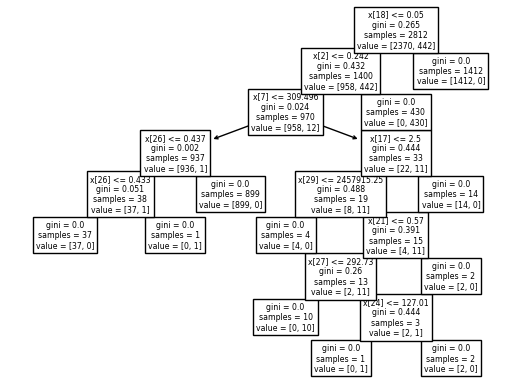

In [ ]:
print(plot_tree(model1))